### NYC Airbnb Data Visualization and Analysis 

##### Project description: 
This project uses a dataset that contains almost 50k airbnb listings in NYC. Information about the listings include room info, host info, neighbourhoods, geographical location, reviews, availability and etc. 

The purpose of this task is to predict the price of NYC Airbnb rentals based on the data provided and any external datasets with relevant information. 

The dataset is from Kaggle: https://www.kaggle.com/code/ssslll007/nyc-airbnb-data-visualization-and-analysis

The link: https://www.kaggle.com/code/ssslll007/nyc-airbnb-data-visualization-and-analysis


#### Proejct Pipeline: 
1. Data extract and preprocessing: Missing values & Abnormal values & Redundant features

2. Exploratory data analysis and visualization: Price related and Geographical distributions

3. Prediction using two of the most popular techniques: Linear Regression and Gradient Bossting 

4. Summary

In [1]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno  # specialised library for visualising missing data 

In [ ]:

import sys
print(sys.executable)

In [ ]:
!"c:\\Users\\Laura.Yu\\AppData\\Local\\Programs\\Python\\Python311\\python.exe" -m pip install seaborn

In [ ]:
!"c:\\Users\\Laura.Yu\\AppData\\Local\\Programs\\Python\\Python311\\python.exe" -m pip install missingno

In [ ]:
!pip install missingno

In [2]:
# pycharm configuration to display the whole dataframe printed in the "run" output
pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 10)

## Data Extract and Preprocessing 

In [3]:
# Load the data
airbnb = pd.read_csv ('AB_NYC_2019.csv')

In [4]:
# inspect the dataset structure 

print('number of samples:', airbnb.shape[0])
print('number of columns:', airbnb.shape[1])

print (airbnb.head()) # view first 5 lines

number of samples: 48895
number of columns: 16
     id                                              name  host_id    host_name neighbourhood_group  ... number_of_reviews  last_review  reviews_per_month calculated_host_listings_count  availability_365
0  2539                Clean & quiet apt home by the park     2787         John            Brooklyn  ...                 9   2018-10-19               0.21                              6               365
1  2595                             Skylit Midtown Castle     2845     Jennifer           Manhattan  ...                45   2019-05-21               0.38                              2               355
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632    Elisabeth           Manhattan  ...                 0          NaN                NaN                              1               365
3  3831                   Cozy Entire Floor of Brownstone     4869  LisaRoxanne            Brooklyn  ...               270   2019-07-05  

In [5]:
# check the data information

print('Dataframe: \n')
print(airbnb.info(verbose=True))

Dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review        

In [6]:
# Check null values. Important questions when thinking about missing data: 
# 1. How prevalent is the missing data? 
# 2. Is missing data random or does it have a pattern? 

print('\nNull Values in datasets:\n')
print(airbnb.isnull().sum().sort_values(ascending=False))

print('\nPercentage of null values in last_review column: ', round(airbnb['last_review'].isnull().sum()/len(airbnb)*100,2), '%')


Null Values in datasets:

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
neighbourhood_group                   0
neighbourhood                         0
id                                    0
host_id                               0
longitude                             0
latitude                              0
room_type                             0
price                                 0
number_of_reviews                     0
minimum_nights                        0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Percentage of null values in last_review column:  20.56 %


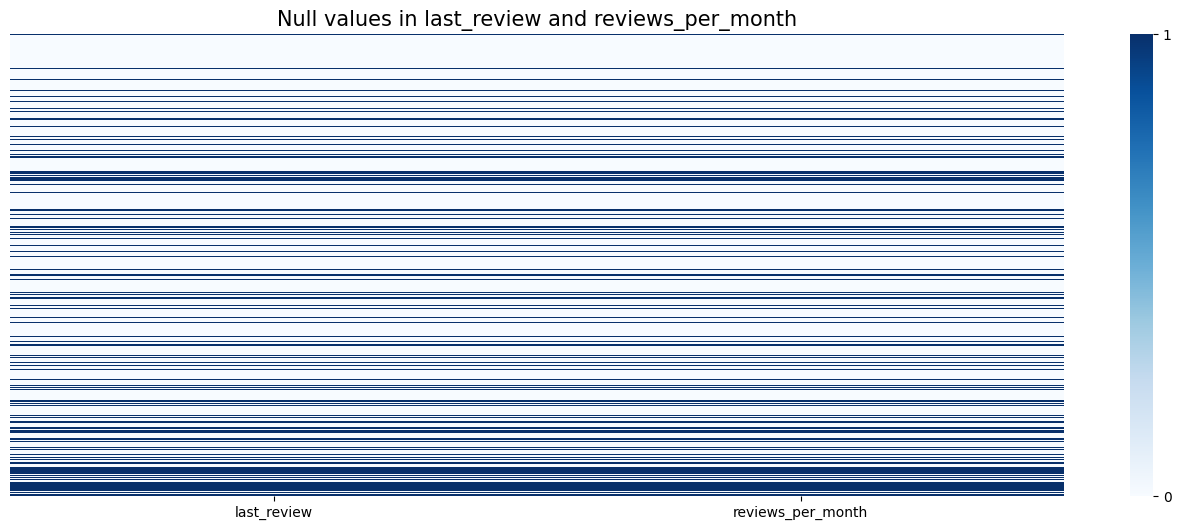

In [7]:
# From the above result, we can see both last_review and reviews_per_month have the same large amount of null values. 
# Also number of null values for host_names and name are different, so maybe there is something worth exploring.
 
fig, ax = plt.subplots(figsize=(17,6))
plt.title ('Null values in last_review and reviews_per_month', fontsize=15)

sns.heatmap(airbnb[['last_review', 'reviews_per_month']].isnull(), cmap='Blues', yticklabels=False, ax=ax, cbar_kws={'ticks': [0, 1]})
# sns.heatmap is used to visualise missing values as heatmap 
# yticklabels=False hides row labels 
# cbar_kws ={'ticks=[0, 1]} sets the color bar ticks to show 0 (not null) and 1 (null)
plt.show()

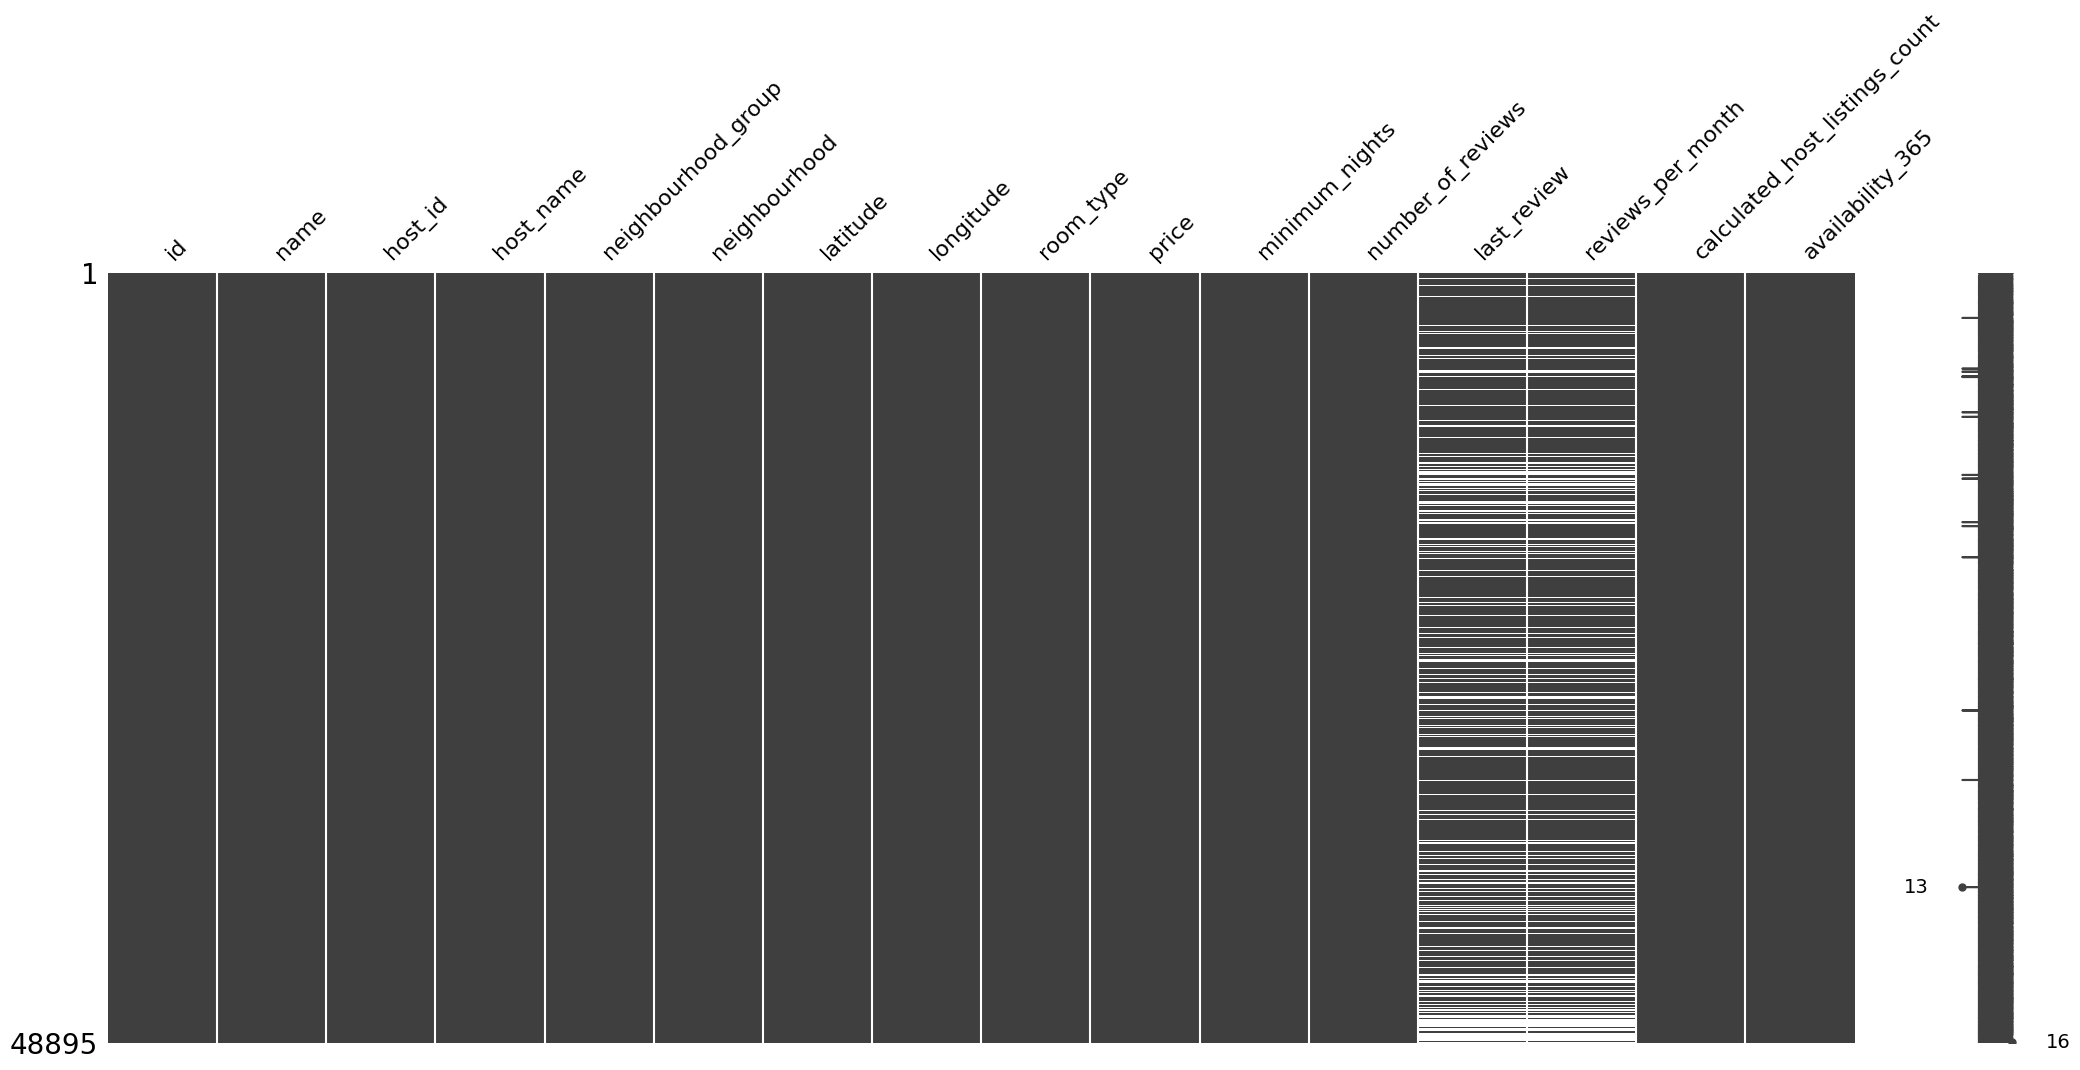

In [8]:
# visualize the columns with missing values to see how they are distributed 
msno.matrix(airbnb)
plt.show()

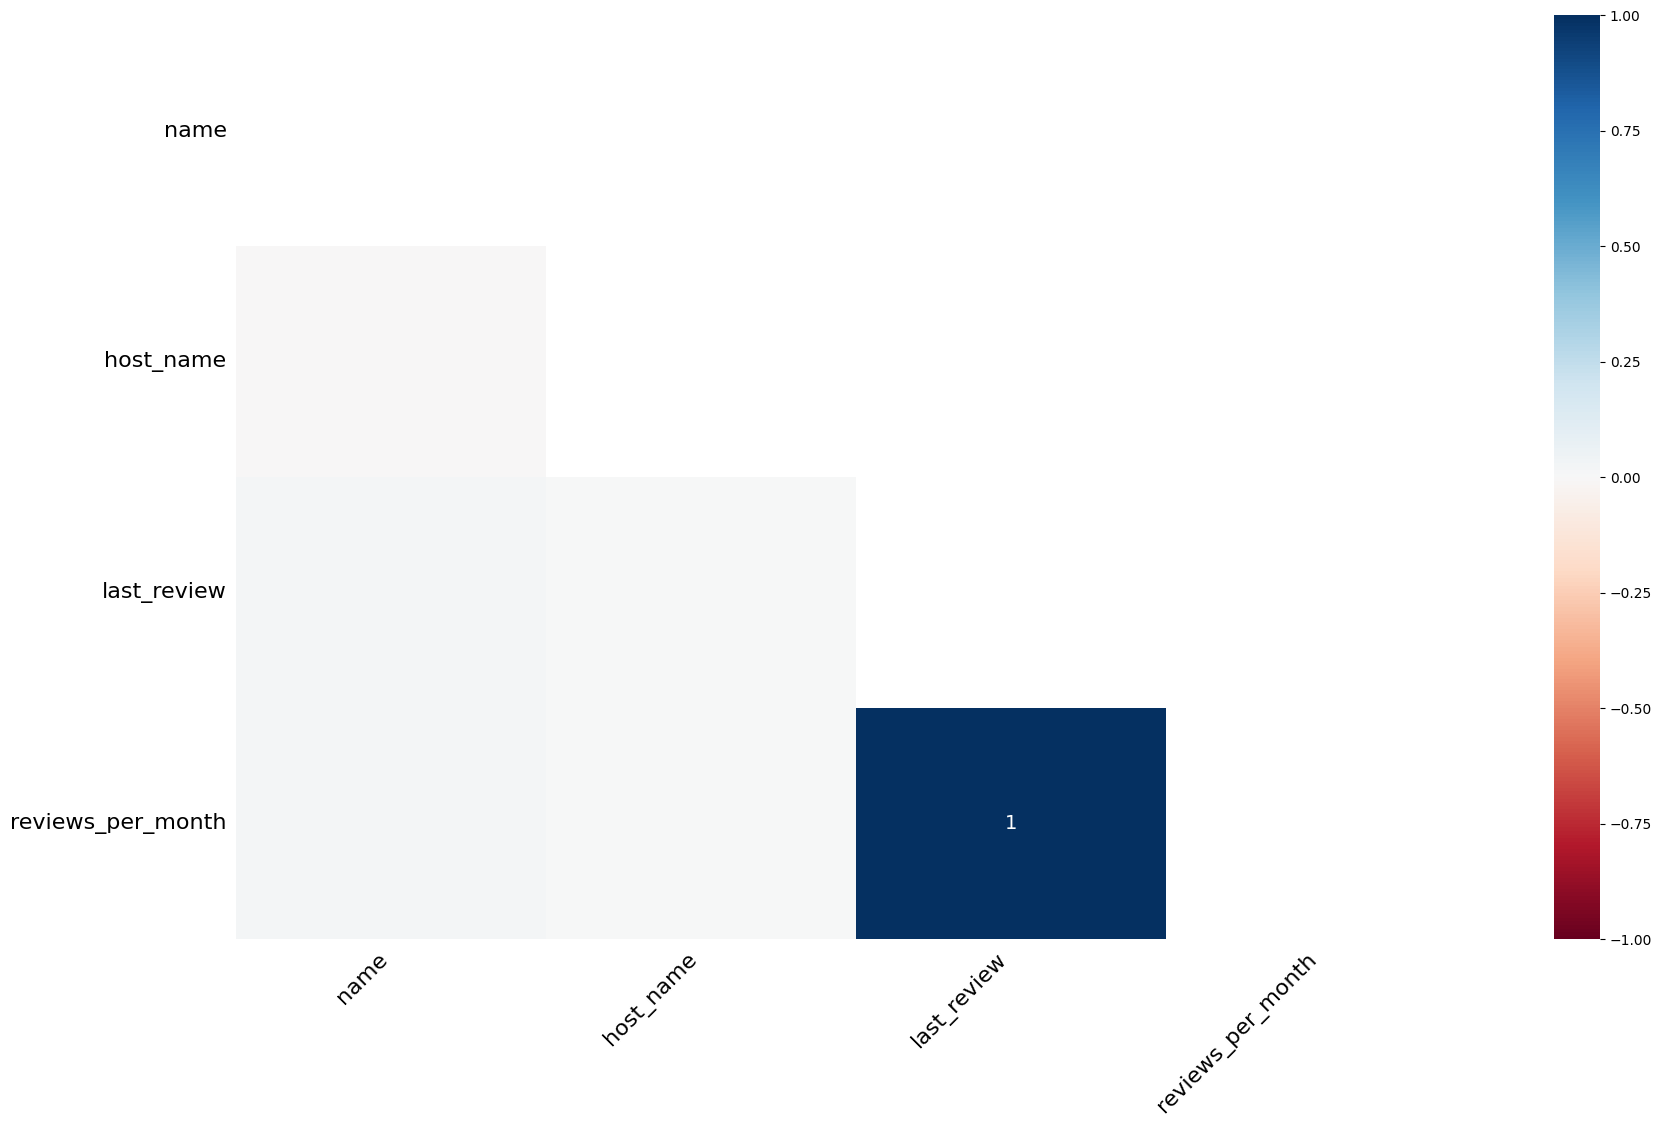

In [9]:
# using the matrix function we can very quickly find that review_per_month and last review have a very similar pattern of missing values while missing values from host_name dont show such pattern.
msno.heatmap(airbnb)
plt.show()

In [10]:
# using the heatmap function, we can tell correlation of missingness between reviews_per_month and last_review is 1, which means if one veriable appears then the other variable is very likely to be present. 

# also it seems column number_of_reviews usually has a value of 0 when last_review is null. So column last_review may be dropped

airbnb.drop('last_review', axis=1, inplace=True)

In [11]:
# and we will fillna the other columns that have null values 
airbnb['reviews_per_month'].fillna(value=0, inplace=True)
airbnb['name'].fillna(value='$', inplace=True)
airbnb['host_name'].fillna(value='#', inplace=True)
# inplace = True this modifies the original dataframe directly, so dont need to reassign it again

C:\Users\Laura.Yu\AppData\Local\Temp\ipykernel_29336\3210958720.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb['reviews_per_month'].fillna(value=0, inplace=True)
C:\Users\Laura.Yu\AppData\Local\Temp\ipykernel_29336\3210958720.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [12]:
# there are a few listings with zero listing price. whats the purpose of listing a place asking for 0 dollars? are those legit data entries? 
zero_price = airbnb[airbnb['price']== 0]
print(zero_price.head(3))

             id                                               name    host_id     host_name neighbourhood_group  ... minimum_nights  number_of_reviews  reviews_per_month calculated_host_listings_count  availability_365
23161  18750597  Huge Brooklyn Brownstone Living, Close to it all.    8993084      Kimberly            Brooklyn  ...              4                  1               0.05                              4                28
25433  20333471      ★Hostel Style Room | Ideal Traveling Buddies★  131697576        Anisha               Bronx  ...              2                 55               2.56                              4               127
25634  20523843    MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)   15787004  Martial Loft            Brooklyn  ...              2                 16               0.71                              5                 0

[3 rows x 15 columns]


In [13]:
# there are 11 listings with 0 prices, yet nothing looks special about those listings. get rid of those 0 priced listings as they can be misleading. 

airbnb = airbnb[airbnb['price']>0]

In [14]:
# re-check if all null values are handled 
print('Null values in datasets:\n')
print(airbnb.isnull().sum().sort_values(ascending=False))

print('Number of samples:', airbnb.shape[0]) # row

Null values in datasets:

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64
Number of samples: 48884


In [15]:
# learn about dtypes of each feature in the dataframe 
print('\nData types: \n')
print(airbnb.info(verbose=True))


Data types: 

<class 'pandas.core.frame.DataFrame'>
Index: 48884 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48884 non-null  int64  
 1   name                            48884 non-null  object 
 2   host_id                         48884 non-null  int64  
 3   host_name                       48884 non-null  object 
 4   neighbourhood_group             48884 non-null  object 
 5   neighbourhood                   48884 non-null  object 
 6   latitude                        48884 non-null  float64
 7   longitude                       48884 non-null  float64
 8   room_type                       48884 non-null  object 
 9   price                           48884 non-null  int64  
 10  minimum_nights                  48884 non-null  int64  
 11  number_of_reviews               48884 non-null  int64  
 12  reviews_per_month     

In [16]:
# generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution 
print('\nData descriptive: \n')
print(airbnb.describe()) # descriptive statistics for all numerical columns 


Data descriptive: 

                 id       host_id      latitude     longitude         price  minimum_nights  number_of_reviews  reviews_per_month  calculated_host_listings_count  availability_365
count  4.888400e+04  4.888400e+04  48884.000000  48884.000000  48884.000000    48884.000000       48884.000000       48884.000000                    48884.000000      48884.000000
mean   1.901679e+07  6.762203e+07     40.728953    -73.952176    152.755053        7.029887          23.271991           1.090800                        7.144628        112.779498
std    1.098432e+07  7.861666e+07      0.054532      0.046159    240.170260       20.512224          44.551331           1.597213                       32.956185        131.627271
min    2.539000e+03  2.438000e+03     40.499790    -74.244420     10.000000        1.000000           0.000000           0.000000                        1.000000          0.000000
25%    9.470548e+06  7.817310e+06     40.690100    -73.983080     69.000000    

Exploratory data analysis 

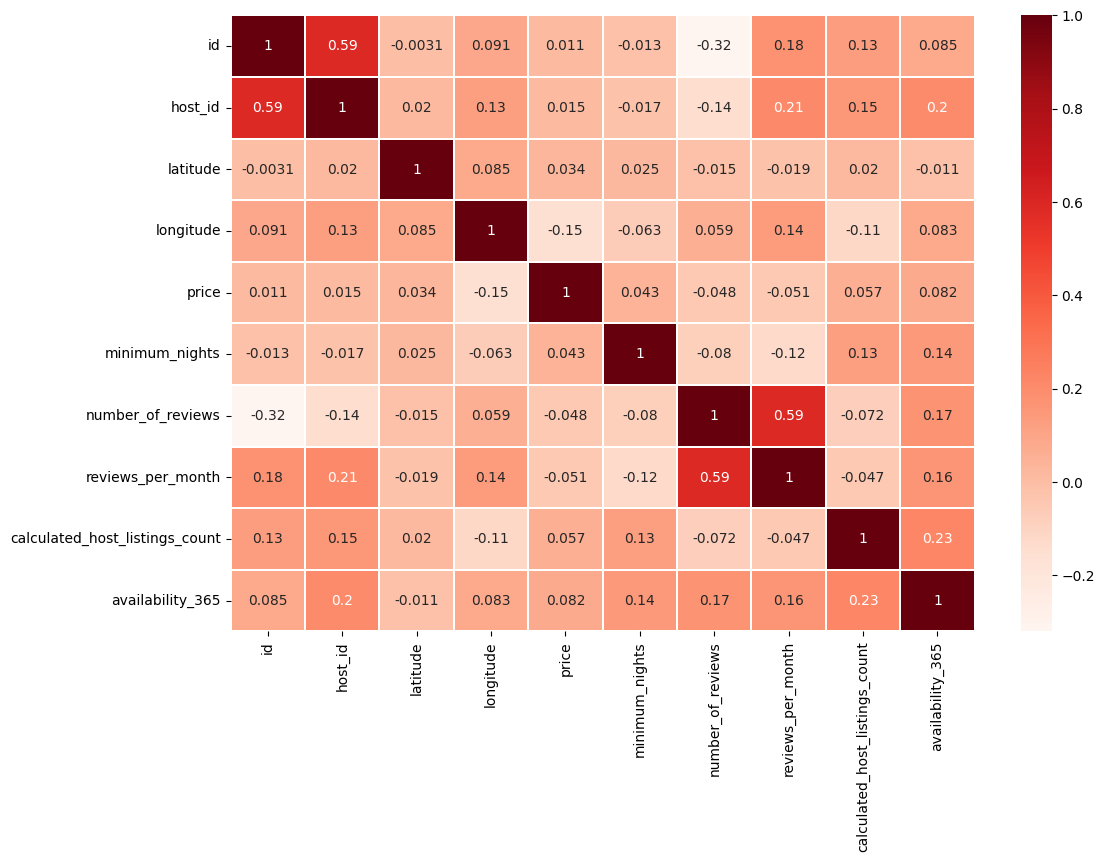

In [18]:
# A quick overview of correlations between features using heatmap
airbnb_numeric_data = airbnb.select_dtypes(include='number')

plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.yticks(rotation=45)

sns.heatmap(airbnb_numeric_data.corr(), annot=True, linewidths=0.1, cmap='Reds')
plt.show()

room_type
Entire home/apt    25407
Private room       22319
Shared room         1158
Name: count, dtype: int64


C:\Users\Laura.Yu\AppData\Local\Temp\ipykernel_29336\284761989.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=airbnb, palette='viridis')


Text(0.5, 1.0, 'No of Listings Per Room Type')

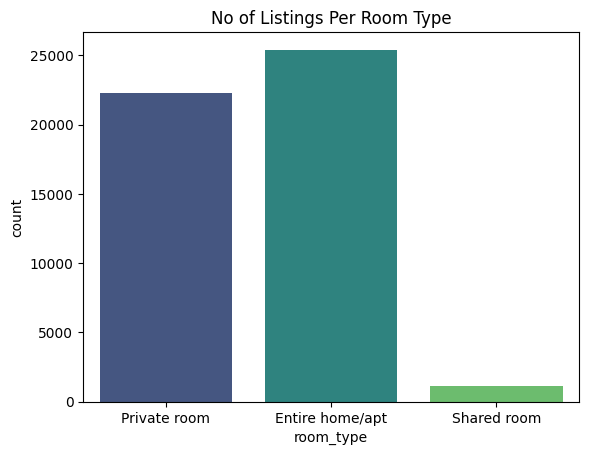

In [19]:
print(airbnb['room_type'].value_counts())
sns.countplot(x='room_type', data=airbnb, palette='viridis')
plt.title('No of Listings Per Room Type')

In [20]:
# Let's see how many listings a host usually has
def listing_count(count):
    if count == 1:
        return 'only 1'
    elif count<=3:
        return '2-3'
    elif count<=5:
        return '4-5'
    elif count<=10:
        return '6-10'
    elif count<=20:
        return '11-20'
    elif count<=30:
        return '21-30'
    elif count <= 50:
        return '31-50'
    elif count<=80:
        return '51-80'
    else:
        return '81+'


C:\Users\Laura.Yu\AppData\Local\Temp\ipykernel_29336\1565389217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x='host_listings_count_group', data=airbnb, order=['only 1','2-3','4-5','6-10','11-20','21-30','31-50','51-80','81+'], palette= 'viridis')


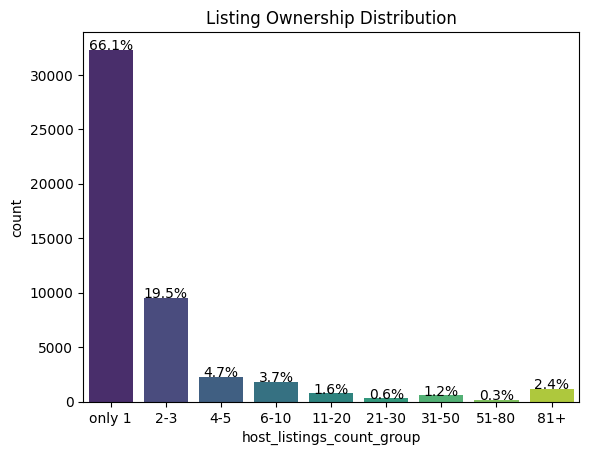

In [21]:
airbnb['host_listings_count_group'] =airbnb['calculated_host_listings_count'].apply(listing_count)

g = sns.countplot(x='host_listings_count_group', data=airbnb, order=['only 1','2-3','4-5','6-10','11-20','21-30','31-50','51-80','81+'], palette= 'viridis')
plt.title('Listing Ownership Distribution')
total = float(len(airbnb))

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format(height / total*100),
            ha="center")

(np.float64(-1.1399976201395385),
 np.float64(1.9399504580686266),
 np.float64(-1.2048658617934076),
 np.float64(1.10499360965465))

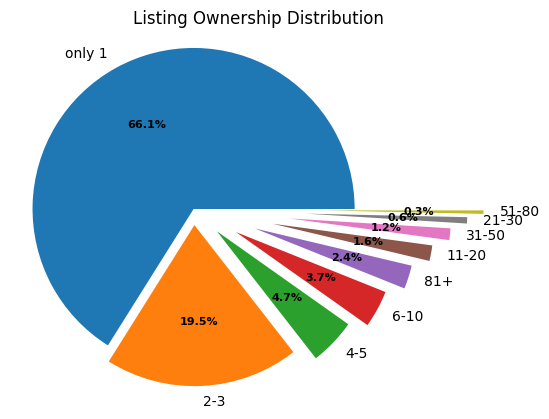

In [22]:
# convert it to pie chart 
listing_counts = airbnb.groupby('host_listings_count_group').agg('count')
label = listing_counts['id'].sort_values(ascending=False).index
size= listing_counts['id'].sort_values(ascending=False)
exp= (0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8)

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(size, explode=exp, labels=label, autopct='%1.1f%%', shadow=False, startangle=0)
ax.set(title='Listing Ownership Distribution')
plt.setp(autotexts, size=8, weight='bold')
ax.axis('equal')

neighbourhood_group
Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: count, dtype: int64


Text(0.5, 1.0, 'No of Listing Per Neighbourhood Group')

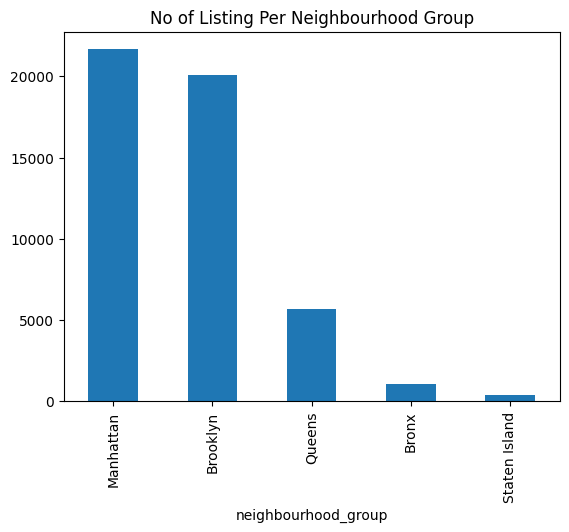

In [23]:
# number of listings per neighborhood groups 

print(airbnb['neighbourhood_group'].value_counts(ascending=False))
airbnb['neighbourhood_group'].value_counts(ascending=False).plot.bar()
plt.title('No of Listing Per Neighbourhood Group')

In [24]:
# find the top 3 neighborhood with most number of listings in each neighborhood group
for group_name in airbnb['neighbourhood_group'].unique():
    neighbor = airbnb[airbnb['neighbourhood_group'] == group_name]['neighbourhood'].value_counts(ascending=False)[:3]
    print('{} top 3 neighborhoods with corresponding count of listings:\n{} \n'.format(group_name,neighbor))

Brooklyn top 3 neighborhoods with corresponding count of listings:
neighbourhood
Williamsburg          3919
Bedford-Stuyvesant    3710
Bushwick              2462
Name: count, dtype: int64 

Manhattan top 3 neighborhoods with corresponding count of listings:
neighbourhood
Harlem             2658
Upper West Side    1971
Hell's Kitchen     1958
Name: count, dtype: int64 

Queens top 3 neighborhoods with corresponding count of listings:
neighbourhood
Astoria             900
Long Island City    537
Flushing            426
Name: count, dtype: int64 

Staten Island top 3 neighborhoods with corresponding count of listings:
neighbourhood
St. George       48
Tompkinsville    42
Stapleton        27
Name: count, dtype: int64 

Bronx top 3 neighborhoods with corresponding count of listings:
neighbourhood
Kingsbridge    70
Fordham        63
Longwood       62
Name: count, dtype: int64 



Text(0.5, 1.0, 'Number of listings in each neighbourhood per room type')

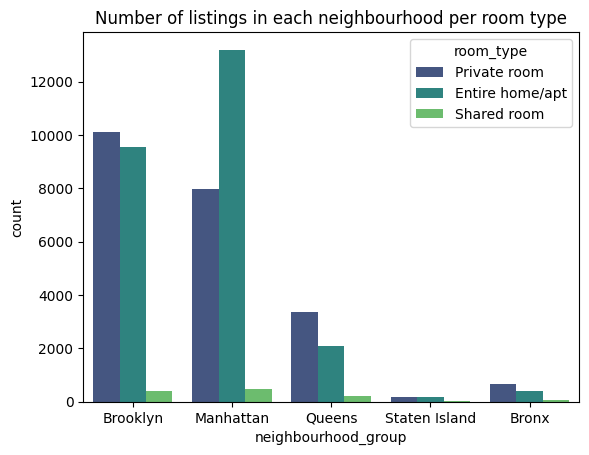

In [25]:
# the number of listings per neighbourhood group, categories by room type 

sns.countplot(x='neighbourhood_group', data=airbnb, hue='room_type', palette='viridis')
plt.title('Number of listings in each neighbourhood per room type')

In [26]:
# number of listings per neighborhood, categorized by room type, sort in DESC order by count of listings
listing_per_neighbour = airbnb.groupby(['room_type', 'neighbourhood'],sort=False)['id'].agg([('count', 'count')]).reset_index().sort_values(by=['room_type','count'],ascending=[True, False])
print(listing_per_neighbour)

           room_type       neighbourhood  count
13   Entire home/apt        Williamsburg   1890
18   Entire home/apt  Bedford-Stuyvesant   1591
39   Entire home/apt     Upper East Side   1310
10   Entire home/apt     Upper West Side   1256
21   Entire home/apt      Hell's Kitchen   1187
..               ...                 ...    ...
532      Shared room      Pelham Gardens      1
533      Shared room            Longwood      1
534      Shared room       Randall Manor      1
536      Shared room           Bronxdale      1
537      Shared room     Stuyvesant Town      1

[540 rows x 3 columns]


In [27]:
# top 10 neighbourhoods with most number of listings per each room type 
top10 = listing_per_neighbour.groupby(['room_type']).apply(lambda x: x.nlargest(10, 'count'))
# apply a lambda function to each group, x for each group, x.nlargest(10, 'count') 10 rows with the highest values
print(top10)

                           room_type       neighbourhood  count
room_type                                                      
Entire home/apt 13   Entire home/apt        Williamsburg   1890
                18   Entire home/apt  Bedford-Stuyvesant   1591
                39   Entire home/apt     Upper East Side   1310
                10   Entire home/apt     Upper West Side   1256
                21   Entire home/apt      Hell's Kitchen   1187
                22   Entire home/apt        East Village   1170
                1    Entire home/apt             Midtown   1100
                30   Entire home/apt              Harlem   1036
                38   Entire home/apt             Chelsea    820
                16   Entire home/apt       Crown Heights    759
Private room    6       Private room  Bedford-Stuyvesant   2034
                37      Private room        Williamsburg   1997
                49      Private room            Bushwick   1718
                2       Private room    

C:\Users\Laura.Yu\AppData\Local\Temp\ipykernel_29336\1931340411.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top10 = listing_per_neighbour.groupby(['room_type']).apply(lambda x: x.nlargest(10, 'count'))


C:\Users\Laura.Yu\AppData\Local\Temp\ipykernel_29336\83789765.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='neighbourhood',y='count',data=top10[top10['room_type']=='Entire home/apt'],ax=axes[0],palette='viridis')
C:\Users\Laura.Yu\AppData\Local\Temp\ipykernel_29336\83789765.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='neighbourhood',y='count',data=top10[top10['room_type']=='Private room'],ax=axes[1],palette='viridis')
C:\Users\Laura.Yu\AppData\Local\Temp\ipykernel_29336\83789765.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn

Text(0.5, 1.0, 'Shared room')

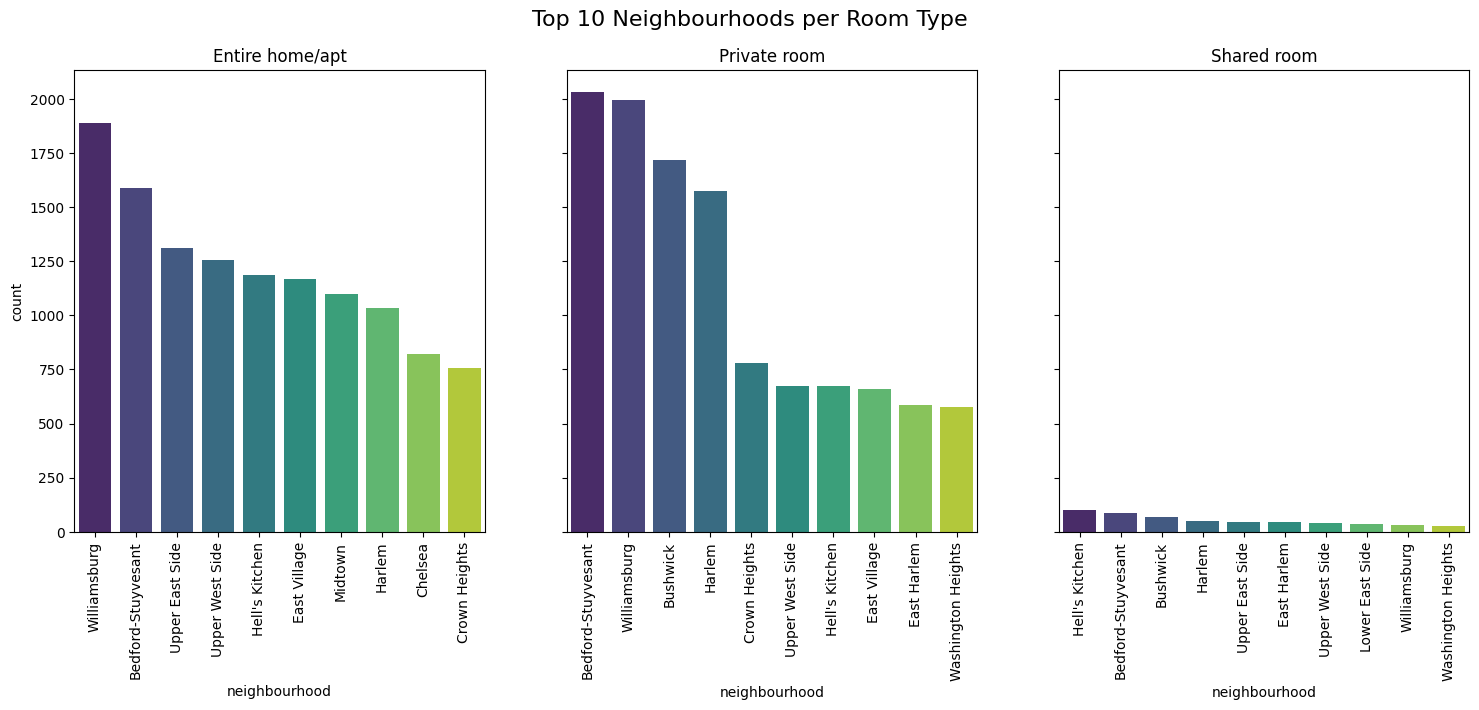

In [28]:
# visualize the top 10 neighbourhoods per each room type 
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(18,6))
fig.suptitle('Top 10 Neighbourhoods per Room Type', fontsize=16)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

sns.barplot(x='neighbourhood',y='count',data=top10[top10['room_type']=='Entire home/apt'],ax=axes[0],palette='viridis')
axes[0].set_title('Entire home/apt')

sns.barplot(x='neighbourhood',y='count',data=top10[top10['room_type']=='Private room'],ax=axes[1],palette='viridis')
axes[1].set_title('Private room')

sns.barplot(x='neighbourhood',y='count',data=top10[top10['room_type']=='Shared room'],ax=axes[2],palette='viridis')
axes[2].set_title('Shared room')

C:\Users\Laura.Yu\AppData\Local\Temp\ipykernel_29336\2867058738.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='neighbourhood_group', y='price', data=airbnb, palette='viridis')


Text(0.5, 1.0, 'Price Distribution per Neighborhood Group')

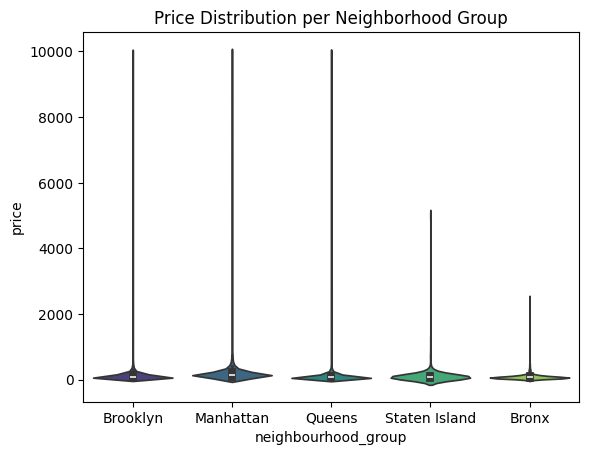

In [29]:
# price distribution per neighborhoodm a quick overview 
sns.violinplot(x='neighbourhood_group', y='price', data=airbnb, palette='viridis')
plt.title('Price Distribution per Neighborhood Group')

C:\Users\Laura.Yu\AppData\Local\Temp\ipykernel_29336\3843377400.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.boxplot(x='neighbourhood_group', y='price', data=airbnb, palette='viridis')


Text(0.5, 1.0, 'Price Distribution per Neighborhood Group')

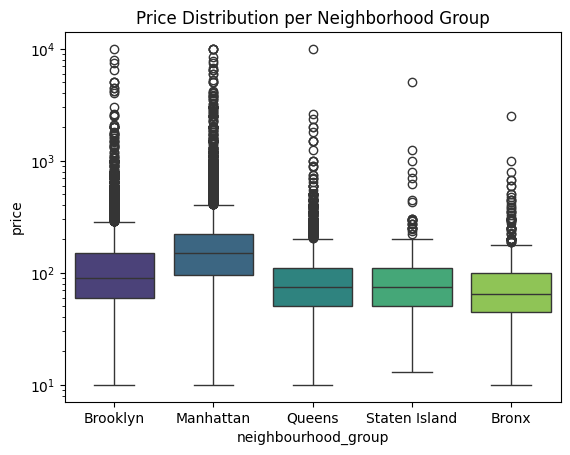

In [30]:
# adjust for the long tails, and take a closer look
g = sns.boxplot(x='neighbourhood_group', y='price', data=airbnb, palette='viridis')
g.set(yscale='log')
plt.title('Price Distribution per Neighborhood Group')

In [31]:
# detailed price statistics in each neighborhood group, for example min.max, 25/50/75 percentile

price_stat = pd.DataFrame() # create a empty dataframe 

for group in airbnb['neighbourhood_group'].unique():
    prices = airbnb[airbnb['neighbourhood_group']== group][['price']]
    stats = prices.describe(percentiles=[.25, .5, .75]) # calculate descriptive statistics
    stats = stats.iloc[1:]
    stats.reset_index(inplace=True)
    stats.rename(columns={'index':'Stats', 'price':group}, inplace=True)
    price_stat = pd.concat([price_stat, stats], axis=1)

price_stat = price_stat.loc[:, ~price_stat.columns.duplicated()].set_index('Stats')
print(price_stat)

           Brooklyn     Manhattan        Queens  Staten Island        Bronx
Stats                                                                      
mean     124.438915    196.884903     99.517649     114.812332    87.577064
std      186.896837    291.386838    167.102155     277.620403   106.725371
min       10.000000     10.000000     10.000000      13.000000    10.000000
25%       60.000000     95.000000     50.000000      50.000000    45.000000
50%       90.000000    150.000000     75.000000      75.000000    65.000000
75%      150.000000    220.000000    110.000000     110.000000    99.000000
max    10000.000000  10000.000000  10000.000000    5000.000000  2500.000000


In [32]:
# average price of listings in each neighborhood 
price_by_nei = airbnb.groupby(['neighbourhood_group', 'neighbourhood'], sort=False)['price'].agg([('price_avg','mean')]).reset_index().sort_values(by=['neighbourhood_group', 'price_avg'],ascending=[True, False])
highest10 = price_by_nei.groupby(['neighbourhood_group']).apply(lambda x: x.nlargest(10, 'price_avg'))

print(highest10)

                        neighbourhood_group       neighbourhood   price_avg
neighbourhood_group                                                        
Bronx               138               Bronx           Riverdale  442.090909
                    120               Bronx         City Island  173.000000
                    92                Bronx      Spuyten Duyvil  154.750000
                    58                Bronx         Eastchester  141.692308
                    213               Bronx           Unionport  137.142857
                    209               Bronx  Westchester Square  122.200000
                    175               Bronx          West Farms  122.000000
                    156               Bronx            Van Nest  113.818182
                    57                Bronx        Clason Point  112.761905
                    171               Bronx          Pelham Bay  105.000000
Brooklyn            137            Brooklyn            Sea Gate  487.857143
            

C:\Users\Laura.Yu\AppData\Local\Temp\ipykernel_29336\804513487.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  highest10 = price_by_nei.groupby(['neighbourhood_group']).apply(lambda x: x.nlargest(10, 'price_avg'))


C:\Users\Laura.Yu\AppData\Local\Temp\ipykernel_29336\3267746523.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='neighbourhood', y='price_avg', data=highest10[highest10['neighbourhood_group']=='Manhattan'], ax=axes[0], palette='viridis')
C:\Users\Laura.Yu\AppData\Local\Temp\ipykernel_29336\3267746523.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='neighbourhood',y='price_avg',data=highest10[highest10['neighbourhood_group']=='Brooklyn'],ax=axes[1],palette='viridis')
C:\Users\Laura.Yu\AppData\Local\Temp\ipykernel_29336\3267746523.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

Text(0.5, 1.0, 'Bronx')

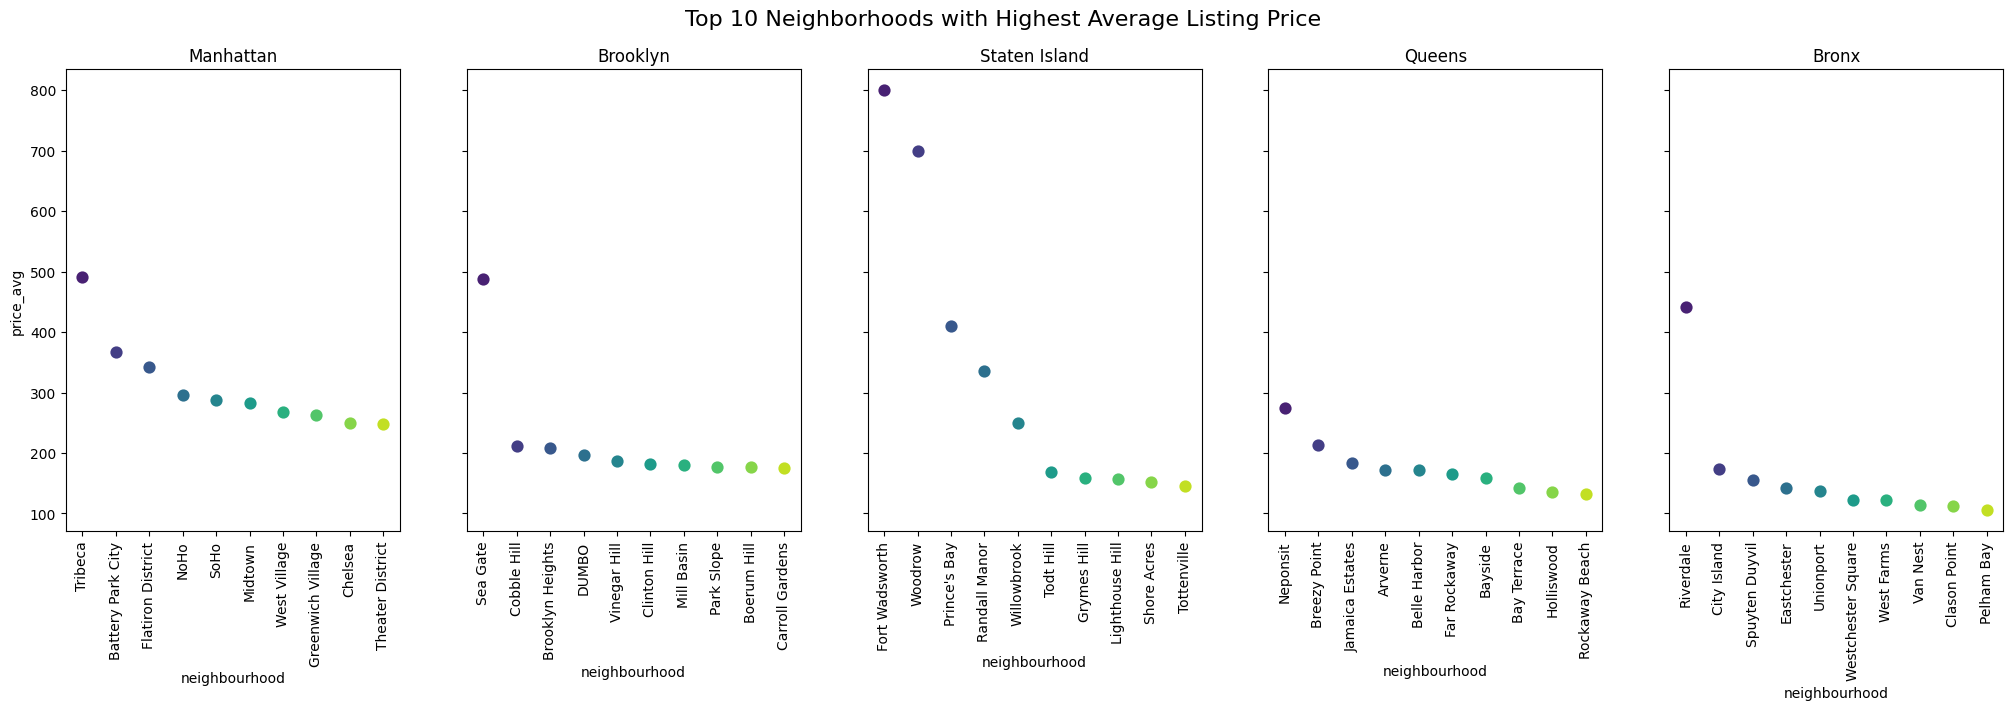

In [33]:
# visualize top 10 neighborhoods with highest average price within each neighborhood group 

fig, axes = plt.subplots(nrows=1, ncols=5, sharey=True, figsize=(25,6))
fig.suptitle('Top 10 Neighborhoods with Highest Average Listing Price', fontsize=16)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
    ax.yaxis.label.set_visible(False)

sns.pointplot(x='neighbourhood', y='price_avg', data=highest10[highest10['neighbourhood_group']=='Manhattan'], ax=axes[0], palette='viridis')
axes[0].set_title('Manhattan')
sns.pointplot(x='neighbourhood',y='price_avg',data=highest10[highest10['neighbourhood_group']=='Brooklyn'],ax=axes[1],palette='viridis')
axes[1].set_title('Brooklyn')
sns.pointplot(x='neighbourhood',y='price_avg',data=highest10[highest10['neighbourhood_group']=='Staten Island'],ax=axes[2],palette='viridis')
axes[2].set_title('Staten Island')
sns.pointplot(x='neighbourhood',y='price_avg',data=highest10[highest10['neighbourhood_group']=='Queens'],ax=axes[3],palette='viridis')
axes[3].set_title('Queens')
sns.pointplot(x='neighbourhood',y='price_avg',data=highest10[highest10['neighbourhood_group']=='Bronx'],ax=axes[4],palette='viridis')
axes[4].set_title('Bronx')

Text(0, 0.5, 'Frequency')

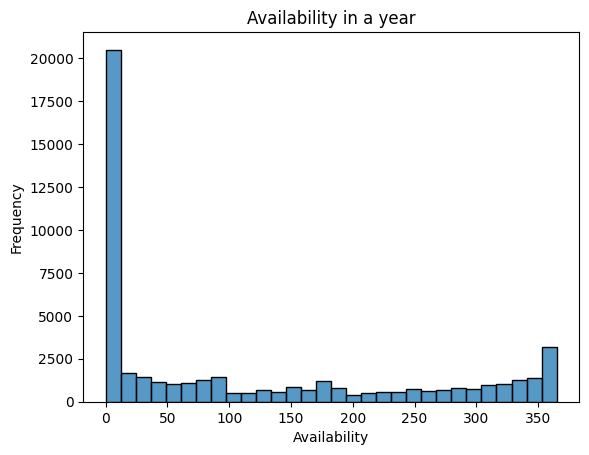

In [36]:
# check the distribution of listing availability 
sns.histplot(airbnb['availability_365'], kde=False)
plt.title('Availability in a year')
plt.xlabel('Availability')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Price v.s. Availability in a year')

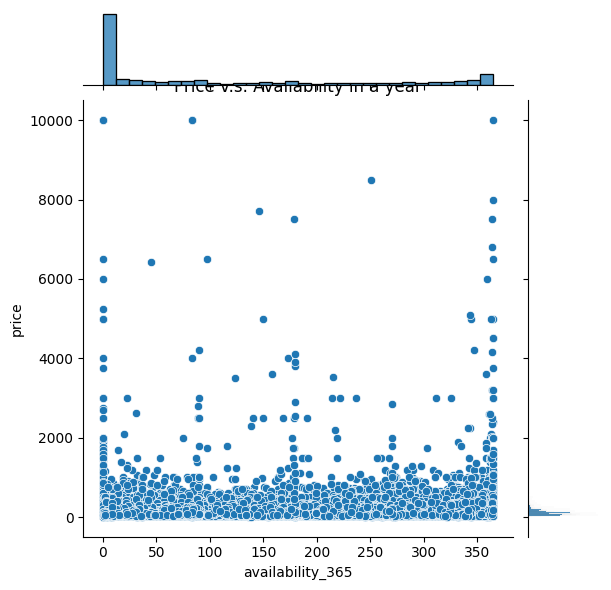

In [37]:
# is there a pattern between price and availability? 
sns.jointplot(x='availability_365', y='price', data=airbnb)
plt.title('Price v.s. Availability in a year')

Text(0.5, 1.0, 'Price v.s. Availability in a year')

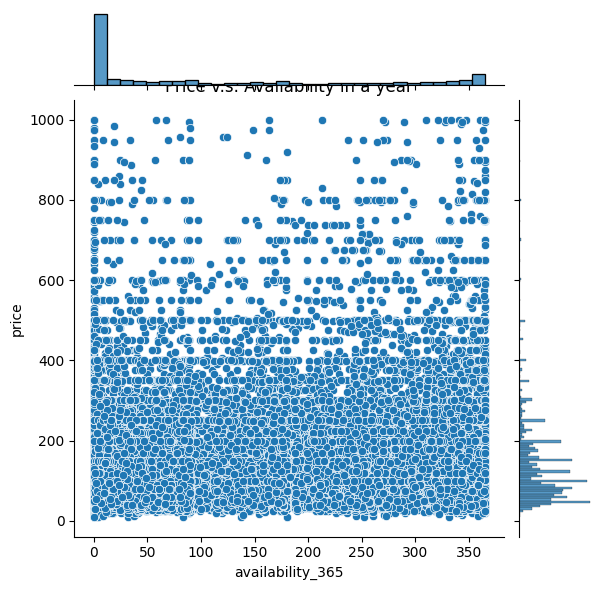

In [ ]:
sns.jointplot(x='availability_365', y='price', data=airbnb[airbnb['price']<1000])
plt.title('Price v.s. Availability in a year')
# so no, theres no pattern between price and availability 

Text(0, 0.5, 'Price')

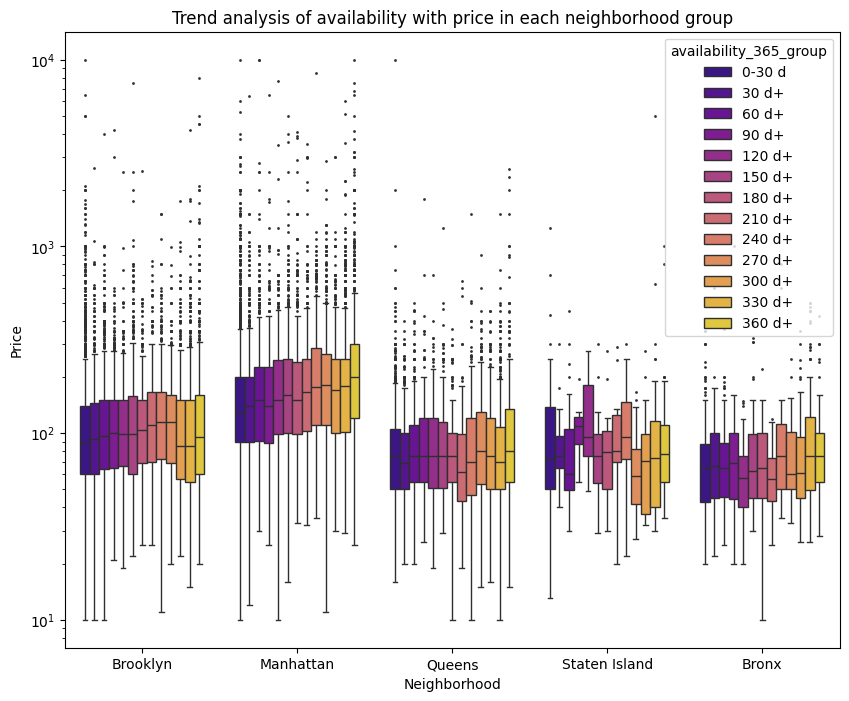

In [ ]:
# next lets do a trend analysis of Airbnb listing prices across different neighbourhood groups, based on how many days per year a listing is available.

# grouping availability
airbnb['availability_365_group_int'] = airbnb['availability_365']//30 * 30
airbnb['availability_365_group'] = airbnb['availability_365_group_int'].apply(lambda x:'0-30 d' if x == 0 else (str(x) +' d+'))

# plotting the data 
plt.figure(figsize=(10,8))
g = sns.boxplot(x='neighbourhood_group', y='price', data=airbnb, hue='availability_365_group', dodge=True, palette='plasma', fliersize=1, linewidth=1,
                hue_order=['0-30 d','30 d+','60 d+','90 d+','120 d+','150 d+','180 d+','210 d+','240 d+','270 d+','300 d+','330 d+','360 d+'])

g.set(yscale='log')
plt.title('Trend analysis of availability with price in each neighborhood group')
plt.xlabel('Neighborhood')
plt.ylabel('Price')

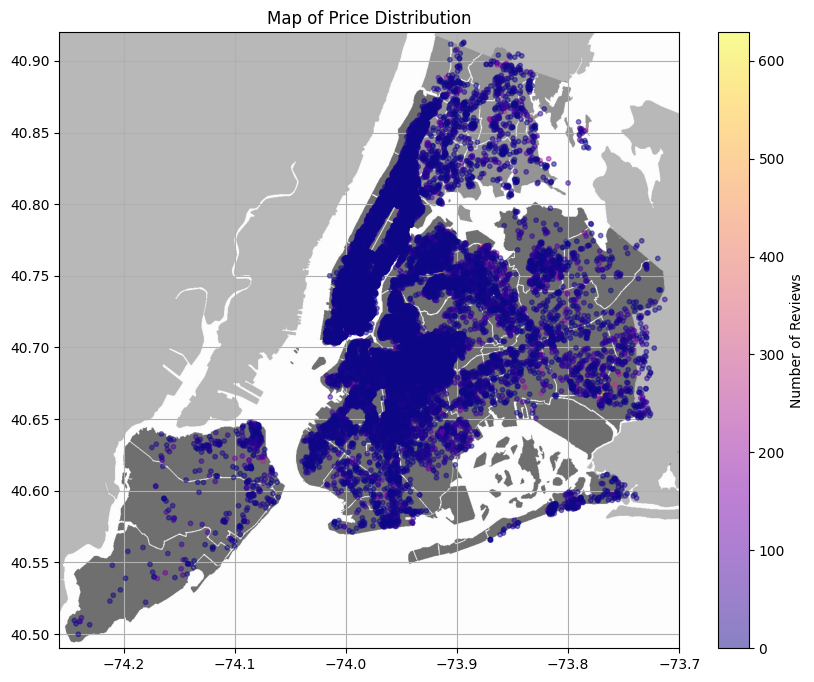

In [ ]:
# Check the distribution of review number, scatter plot 散点图, Longitude 经度 Latitude 纬度

plt.figure(figsize=(10,8))
map_img = plt.imread('New_York_City_.png', 0)
plt.imshow(map_img, zorder=1, aspect='auto', extent=[-74.258, -73.7, 40.49, 40.92]) #zorder =1 ensure the map is in the background layer
g = plt.scatter(x=airbnb['longitude'], y=airbnb['latitude'], c=airbnb['number_of_reviews'], cmap=plt.get_cmap('plasma'), alpha=0.5, s=10, zorder=2)
# zorder=2 places the dots above the map image, alpha =0.5 makes the dots semi-transparent, s=10 sets the dot size. 

plt.title('Map of Price Distribution')
plt.colorbar(g).set_label('Number of Reviews')
plt.grid(True)

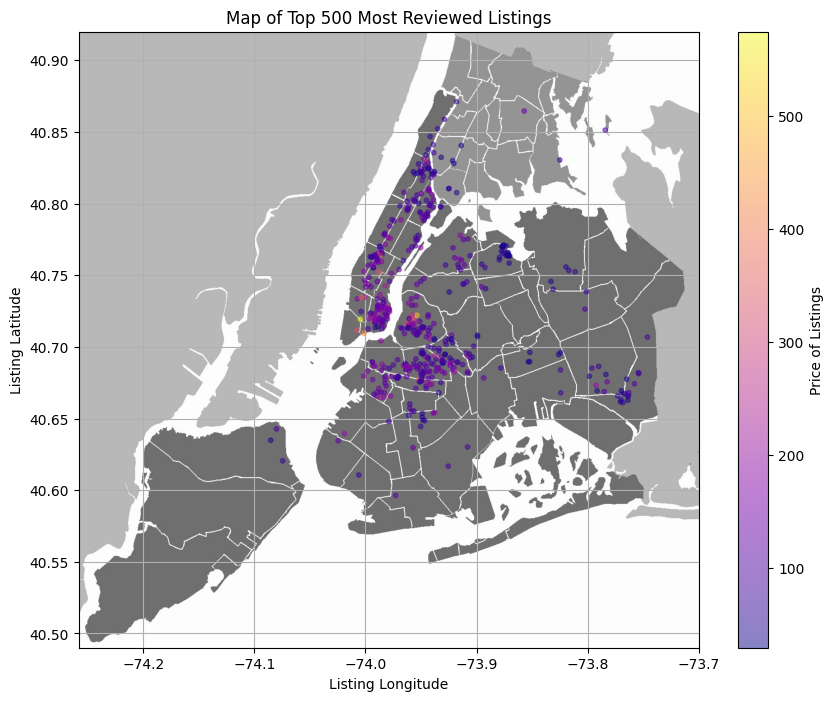

In [47]:
# top 500 most reviewed listings and their locations 
most_reviewed_500 = airbnb.sort_values(by='number_of_reviews', ascending=False)[:500][['host_id', 'number_of_reviews', 'latitude', 'longitude', 'price']]
plt.figure(figsize=(10,8))
map_img = plt.imread('New_York_City_.png', 0)
plt.imshow(map_img, zorder=1, aspect='auto', extent=[-74.258, -73.7, 40.49, 40.92])

g = plt.scatter(x= most_reviewed_500['longitude'], y= most_reviewed_500['latitude'], c= most_reviewed_500['price'], cmap= plt.get_cmap('plasma'), alpha=0.5, s=10, zorder= 2)

plt.title('Map of Top 500 Most Reviewed Listings')
plt.xlabel('Listing Longitude')
plt.ylabel('Listing Latitude')
plt.colorbar(g).set_label('Price of Listings')
plt.grid(True)

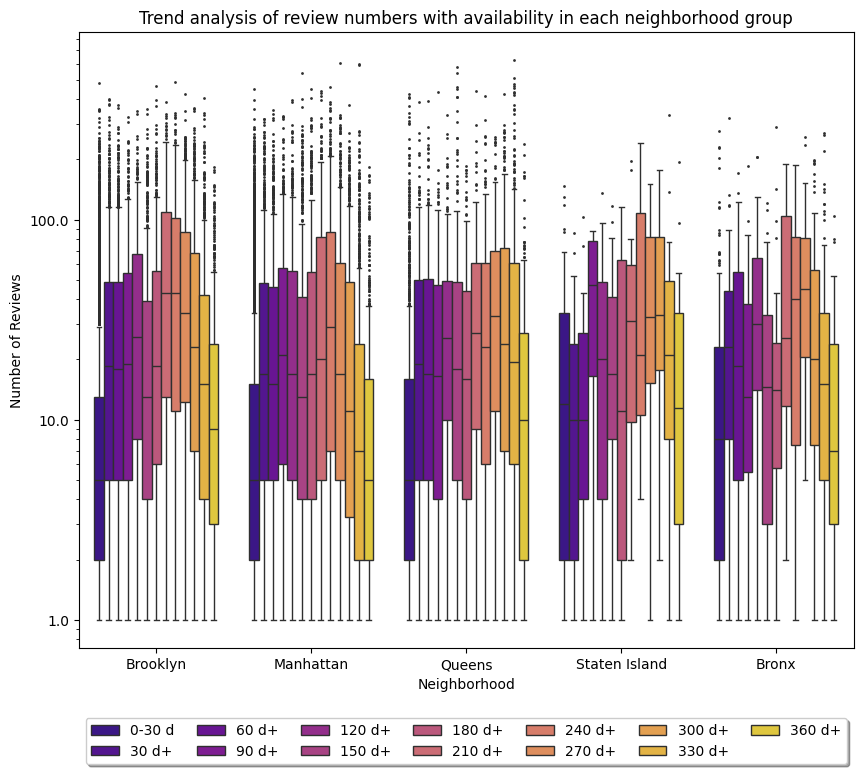

In [55]:
# it looks top reviewed variate along with different availability groups

import matplotlib.ticker as mtick 

plt.figure(figsize=(10,8))

g = sns.boxplot(x='neighbourhood_group', y='number_of_reviews', data=airbnb[airbnb['number_of_reviews']>0], hue='availability_365_group', 
                dodge=True, palette='plasma', fliersize=1, linewidth=1,
                hue_order=['0-30 d','30 d+','60 d+','90 d+','120 d+','150 d+','180 d+','210 d+','240 d+','270 d+','300 d+','330 d+','360 d+'])

g.set_yscale('log',base=10)
g.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))

plt.title('Trend analysis of review numbers with availability in each neighborhood group')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Reviews')
plt.legend(loc='lower left', ncol=airbnb['availability_365_group'].nunique()//2+1, mode='expand', fancybox=True, shadow=True, bbox_to_anchor=(0, -0.2, 1, 0.2))

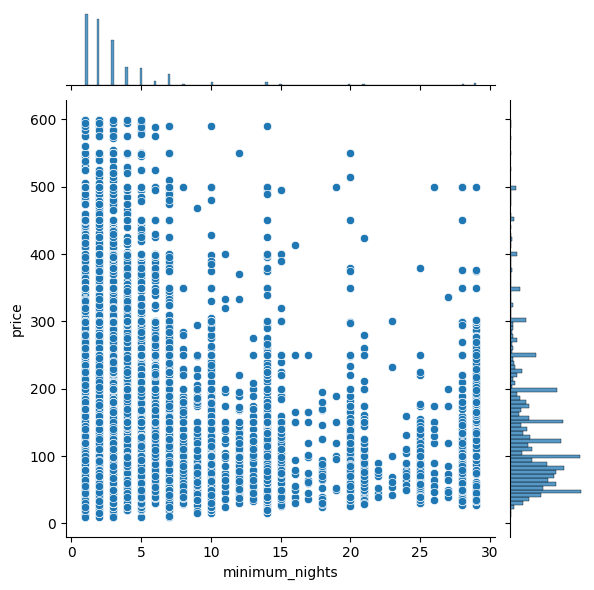

In [52]:
# for convenience we ignore outliers from price and minimum_nights columns 
sns.jointplot(x='minimum_nights', y='price', data=airbnb[(airbnb['price']<600) & (airbnb['minimum_nights']<30)])

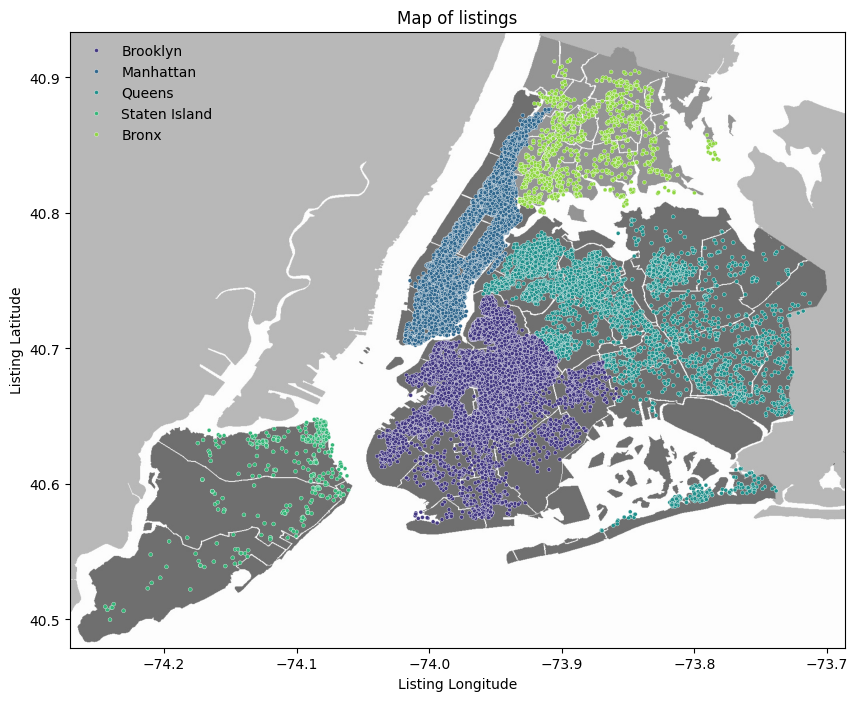

In [ ]:
# exam the location of listings, and display the locations on the NYC map
plt.figure(figsize=(10,8))

g= sns.scatterplot(x='longitude', y='latitude', data=airbnb, hue='neighbourhood_group', s=8, palette='viridis', zorder=2)
map_img = plt.imread('New_York_City_.png', 0)
g.imshow(map_img, zorder=1, extent=g.get_xlim() + g.get_ylim(), aspect=g.get_aspect())

plt.title('Map of listings')
plt.xlabel('Listing Longitude')
plt.ylabel('Listing Latitude')
plt.legend(frameon=False)

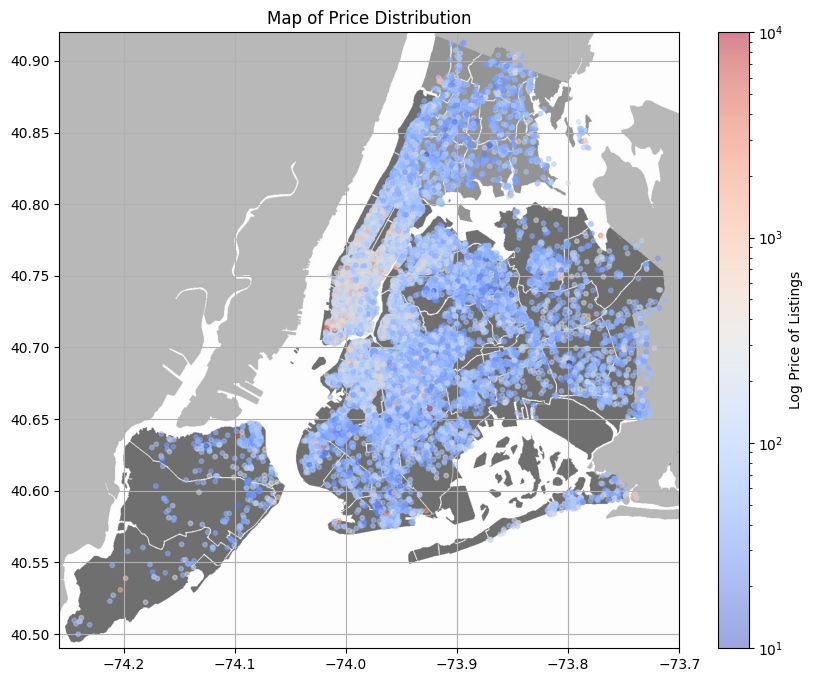

In [59]:
# price distribution on the NYC map
plt.figure(figsize=(10,8))
map_img = plt.imread('New_York_City_.png', 0)
plt.imshow(map_img, zorder=1, extent=[-74.258, -73.7, 40.49, 40.92], aspect='auto')

g= plt.scatter(x=airbnb['longitude'], y=airbnb['latitude'], c=airbnb['price'], cmap=plt.get_cmap('coolwarm'), alpha=0.5, s=10, zorder=2, norm=matplotlib.colors.LogNorm())

plt.title('Map of Price Distribution')
plt.colorbar(g).set_label('Log Price of Listings')
plt.grid(True)

In [60]:
# exam the average price a host posts on all his/her listings 

listing_mean_price = airbnb[airbnb['calculated_host_listings_count']<50].groupby(['host_id', 'calculated_host_listings_count'], sort=False)['price'].agg([('price_avg', 'mean')]).reset_index().sort_values(by=['calculated_host_listings_count', 'price_avg'])

print(listing_mean_price.head())

        host_id  calculated_host_listings_count  price_avg
18180  33511962                               1       10.0
18614  62685070                               1       10.0
18632  84497333                               1       10.0
19069  97001292                               1       10.0
19395  52777892                               1       10.0


C:\Users\Laura.Yu\AppData\Local\Temp\ipykernel_29336\2994699433.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.stripplot(x='calculated_host_listings_count', y='price_avg', data=listing_mean_price, palette='viridis')


[None]

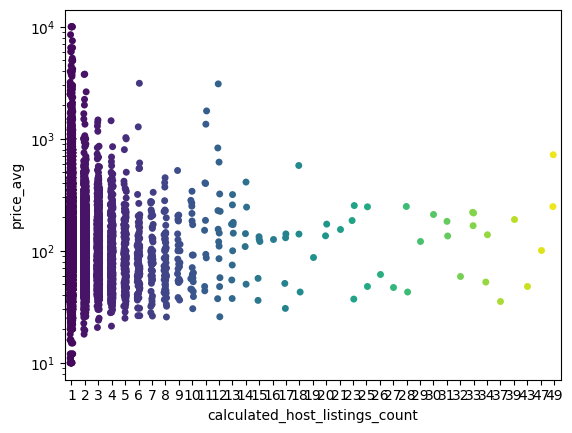

In [61]:
# stripplot to see how host listings count distribute 
g = sns.stripplot(x='calculated_host_listings_count', y='price_avg', data=listing_mean_price, palette='viridis')
g.set(yscale='log')

C:\Users\Laura.Yu\AppData\Local\Temp\ipykernel_29336\1393476082.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.boxplot(x='calculated_host_listings_count', y='price_avg', data=listing_mean_price[listing_mean_price['calculated_host_listings_count']<11], palette='viridis')


[None]

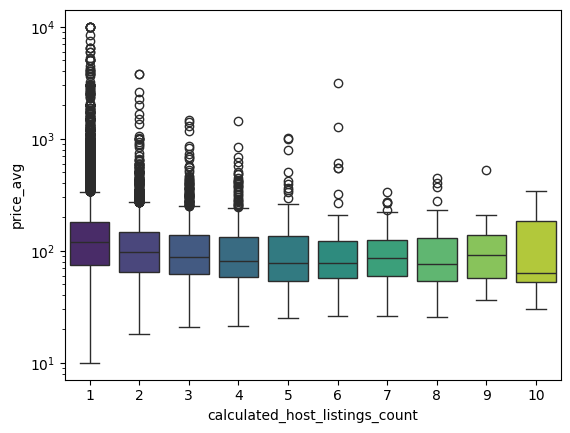

In [62]:
# from abover we can see most hosts own less than 10 listings. focus on those hosts with 10 or less listings
g = sns.boxplot(x='calculated_host_listings_count', y='price_avg', data=listing_mean_price[listing_mean_price['calculated_host_listings_count']<11], palette='viridis')

g.set(yscale='log')

Prediction 

Before we start prediction, one thing to point out is that we are missing some other important features such as average rating of listings. Compared to number of reviews or reviews per month, I think the average rating is a more relevant factor to the price of listings. Also, it'd be great if the dataset contains data on things like parking, gym, in-unit washer/dryer, etc. With above said, we can expect the result of the models might not be robust as the dataset isn't comprehensive...

In [71]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [72]:
airbnb_prep = pd.read_csv('AB_NYC_2019.csv')


In [73]:
airbnb_prep.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)
airbnb_prep['reviews_per_month'] = airbnb_prep['reviews_per_month'].fillna(value=0, inplace=False)
airbnb_prep = airbnb_prep[airbnb_prep['price']>0]

In [ ]:
# LabelEncoder is used to convert categorical text data into numerical labels (prepare data for machine learning models)
# LabelEncode transforms text labels (like 'Manhattan', 'Brooklyn') into integer values (like 0, 1) bcoz ML algorithms require numerical input

le = preprocessing.LabelEncoder() # create instance of the label encoder
le.fit(airbnb_prep['neighbourhood_group'])
airbnb_prep['neighbourhood_group'] = le.transform(airbnb_prep['neighbourhood_group'])

le.fit(airbnb_prep['neighbourhood'])
airbnb_prep['neighbourhood'] = le.transform(airbnb_prep['neighbourhood'])

le.fit(airbnb_prep['room_type'])
airbnb_prep['room_type'] = le.transform(airbnb_prep['room_type'])

In [75]:
airbnb_prep.sort_values(by='price', ascending=True, inplace=True)
print(airbnb_prep.head())

         host_id  neighbourhood_group  neighbourhood  latitude  longitude  ...  minimum_nights  number_of_reviews  reviews_per_month  calculated_host_listings_count  availability_365
22835   97001292                    3            105  40.69085  -73.79916  ...               1                 43               1.68                               1               252
47218  268138154                    1             28  40.69640  -73.91898  ...               1                  2               2.00                               1                 0
34446  205820814                    0             96  40.83454  -73.92751  ...               1                  0               0.00                               1               180
23256   52777892                    2            201  40.76844  -73.95341  ...               3                 10               0.39                               1                 0
32810  167570251                    1            190  40.66242  -73.99464  ...       

In [ ]:
# prepare the data for ML by separating it into features and target, then split into training and testing sets
X = airbnb_prep.drop(['price'], axis=1, inplace= False) # feature matrix 
y = airbnb_prep['price'] # target variable, try to predict 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
# train_test_split(...): training set (80%), testing set (20%), random_state=101: reproducibility

# standard step in supervised learning, train your model on one portion of the data, test it on another to check for overfitting or underperformance


In [ ]:
# train a linear regression model to predict Airbnb listing prices and evaluates how well the model performs

lm = LinearRegression() # create an instance of the LinearRegression model and stores it in the variable lm

lm.fit(X_train, y_train) # this trains the model using your training data 

# predict y using trained model
y_pred = lm.predict(X_test)

# get evaluation matrix
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
""".format(
    np.sqrt(metrics.mean_squared_error(y_test, y_pred)), # Root Mean Squared Error (RMSE): measure the average magnitude of the error, lower better
    metrics.r2_score(y_test, y_pred)*100, # Coefficient of Determination: indicate how well the model explains the variance in the data, 100% means perfect prediction
    metrics.mean_absolute_error(y_test, y_pred) # Mean Absolute Error (MAE), measure the average absolute difference between predicted and actual values
))


        Mean Squared Error: 171.84709840132518
        R2 Score: 14.194158548585312
        Mean Absolute Error: 70.89121517013575



   Actual Values  Predicted Values
0            200        178.237759
1             65         54.675766
2             80         30.033943
3            239        266.532485
4             80        148.836161
5            500        265.082461
6            271        252.537267
7             29         73.693934
8            129        197.494418
9            214        293.386303


Text(0, 0.5, 'Test')

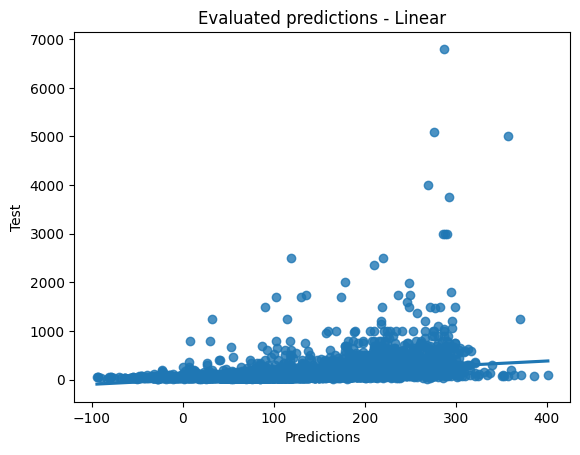

In [ ]:
linear_error = pd.DataFrame({
    'Actual Values': np.array(y_test).flatten(),
    'Predicted Values': y_pred.flatten()
    }) # create a DataFrame comparing the actual target values (y_test) with the predicted values (y_pred)
        # flatten(): ensure the arrays are 1D 
print(linear_error.head(10))

sns.regplot(x=y_pred, y=y_test) #plots a regression line using seaborn, showing how well the predicted values align with the actual ones. 

plt.title('Evaluated predictions - Linear')
plt.xlabel('Predictions')
plt.ylabel('Test')

In [ ]:
# Gradient Boosting Regressor, an ensemble learning method that builds a series of decision trees, where each tree tries to connect the errors of the previous one.
# its often more powerful than linear regression, especially for complex, non-linear relationships.


GBoost = GradientBoostingRegressor() # creates an instance of the Gradient Boosting Regressor model 
GBoost.fit(X_train, y_train)

# predict y using trained model
y_pred2 = GBoost.predict(X_test) 

# get evaluation matrix 
print("""
        Mean Squared Error: {},
        R2 Score: {},
        Mean Absolute Error: {}
      """.format(
          np.sqrt(metrics.mean_squared_error(y_test, y_pred2)),
          metrics.r2_score(y_test, y_pred2)*100,
          metrics.mean_absolute_error(y_test, y_pred2)
      ))



        Mean Squared Error: 161.93830382936693,
        R2 Score: 23.804097118115198,
        Mean Absolute Error: 62.93535128376308
      


   Actual Values  Predicted Value
0            200       194.677339
1             65        66.063931
2             80        51.700213
3            239       239.558596
4             80       121.679691
5            500       317.684958
6            271       247.565709
7             29        60.433030
8            129       154.695867
9            214       328.797571


Text(0, 0.5, 'Test')

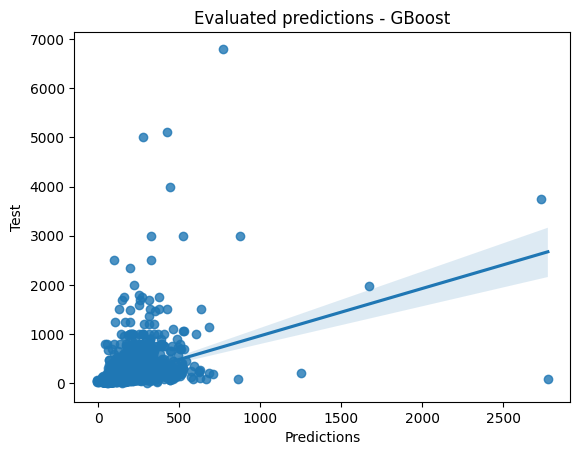

In [81]:
gboost_error = pd.DataFrame({
    'Actual Values': np.array(y_test).flatten(),
    'Predicted Value': y_pred2.flatten()
    })
print(gboost_error.head(10))
sns.regplot(x=y_pred2, y=y_test)

plt.title('Evaluated predictions - GBoost')
plt.xlabel('Predictions')
plt.ylabel('Test')

Summary


This is a good project for data visualization practice with Python. As we mentioned earlier, it's not a good project to practice modelling skills as it misses certain data dimensions.

In this practice, we utilized visualization techniques to explore distribution of each data feature as well as relations between different features. We also made good use of the latitude and longitude columns to generate geographical heatmap color-coded by features such as price, number of reviews.

Another thing we could do is apply natural language processing techniques to study the most frequency words hosts use to name and describe their listings, and to further study on the relationship between the frequent words and the number of reviews. In the dataset we only have name feature of listings, it could be helpful if the dataset has a column for description of listings.

Overall, we discovered a few interesting relations between features, and raised a couple questions worth further discussion.